In [30]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score,roc_curve
import matplotlib.pyplot as plt

In [25]:
Credit_df=pd.read_csv('Creditcard.csv')
Credit_df
y=Credit_df['Class']
Credit_df.drop(columns='Class',inplace=True) 

In [26]:
X_train,X_test,y_train,y_test=train_test_split(Credit_df,y,test_size=0.2,random_state=42) 
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
223361,143352.0,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,...,-0.125390,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,9.99
165061,117173.0,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,...,-0.470372,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,45.90
238186,149565.0,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,...,0.012227,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,11.99
150562,93670.0,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,...,-0.253757,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,117.44
138452,82655.0,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,...,-0.012320,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,25.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,75618.0,1.173488,0.100792,0.490512,0.461596,-0.296377,-0.213165,-0.165254,0.119221,-0.114199,...,-0.157534,-0.186027,-0.574283,0.161405,-0.006140,0.091444,0.109235,-0.020922,0.003967,1.98
259178,159000.0,-0.775981,0.144023,-1.142399,-1.241113,1.940358,3.912076,-0.466107,1.360620,0.400697,...,-0.295730,0.037078,-0.019575,0.241830,0.682820,-1.635109,-0.770941,0.066006,0.137056,89.23
131932,79795.0,-0.146609,0.992946,1.524591,0.485774,0.349308,-0.815198,1.076640,-0.395316,-0.491303,...,0.007155,0.052649,0.354089,-0.291198,0.402849,0.237383,-0.398467,-0.121139,-0.196195,3.94
146867,87931.0,-2.948638,2.354849,-2.521201,-3.798905,1.866302,2.727695,-0.471769,2.217537,0.580199,...,0.417396,-0.332759,-1.047514,0.143326,0.678869,0.319710,0.426309,0.496912,0.335822,1.00


In [28]:
# object Oriented Programming
logreg=LogisticRegression()  
logreg.fit(X_train,y_train)
y_test_pred=logreg.predict(X_test)
y_test # actuals for the test data
y_test_pred # predictions of the test data
y_train_pred=logreg.predict(X_train) # predictions for the train data
y_test # actuals for the test data

43428     1
49906     0
29474     0
276481    0
278846    0
         ..
75723     0
252263    0
221246    0
81910     0
59490     0
Name: Class, Length: 56962, dtype: int64

In [31]:
pos_probabs=logreg.predict_proba(X_test)[::,1]
pos_probabs
fpr,tpr,thresholds=roc_curve(y_test,pos_probabs)
fpr,tpr,thresholds


(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.75858188e-05,
        1.75858188e-05, 3.51716376e-05, 3.51716376e-05, 5.27574564e-05,
        5.27574564e-05, 7.03432752e-05, 7.03432752e-05, 8.79290940e-05,
        8.79290940e-05, 1.05514913e-04, 1.05514913e-04, 1.05514913e-04,
        1.05514913e-04, 1.23100732e-04, 1.23100732e-04, 1.40686550e-04,
        1.40686550e-04, 1.75858188e-04, 1.75858188e-04, 1.93444007e-04,
        1.93444007e-04, 2.11029826e-04, 2.11029826e-04, 2.28615644e-04,
        2.28615644e-04, 2.46201463e-04, 2.46201463e-04, 2.81373101e-04,
        2.81373101e-04, 3.34130557e-04, 3.34130557e-04, 3.51716376e-04,
        3.51716376e-04, 4.04473832e-04, 4.04473832e-04, 4.39645470e-04,
        4.39645470e-04, 5.27574564e-04, 5.27574564e-04, 5.62746201e-04,
        5.62746201e-04, 5.97917839e-04, 5.97917839e-04, 6.33089477e-04,
        6.33089477e-04, 6.85846933e-04, 6.85846933e-04, 7.38604389e-04,
        7.38604389e-04, 7.56190208e-04, 7.56190208e-04, 1.143078

In [32]:
pd.DataFrame({'test-actuals':y_test,'test_pred':y_test_pred})


,test-actuals,test_pred
43428,1,1
49906,0,0
29474,0,0
276481,0,0
278846,0,0
...,...,...
75723,0,0
252263,0,0
221246,0,0
81910,0,0


In [33]:
confusion_matrix(y_test,y_test_pred)

array([[56832,    32],
       [   44,    54]], dtype=int64)

In [34]:
precision_score(y_test,y_test_pred)

0.627906976744186

In [35]:
recall_score(y_test,y_test_pred)

0.5510204081632653

In [36]:
f1_score(y_test,y_test_pred)

0.5869565217391305

0.9026628518599336

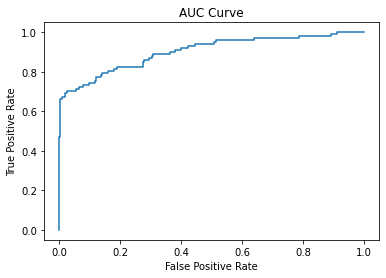

In [37]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curve')
roc_auc_score(y_test,pos_probabs)